# 1 Exploring the Data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.keys())
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


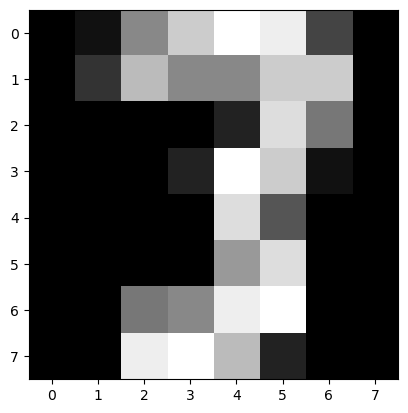

In [4]:
import numpy as np
import matplotlib . pyplot as plt
is_3 = target == 3
img = data[is_3][2].reshape(8, 8) # Reshape the data to 8x8 image
assert 2 == len(img.shape)
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest") # also try interpolation="bicubic"
plt.show()

<div style="color: green; font-weight:
bold">
Coorect usage of np.logical_or as in the sample solution. 
No normalization or relabeling as in sample solution.
</div>

In [109]:
from sklearn import model_selection

# Filter dataset to only include digits 3 and 9
is_3_or_9 = np.logical_or(target == 3, target == 9)
data_3_or_9 = data[is_3_or_9]
target_3_or_9 = target[is_3_or_9]

X_all = data_3_or_9
y_all = target_3_or_9
X_train , X_test , y_train , y_test =\
model_selection.train_test_split (X_all, y_all,
test_size = 0.4, random_state = 0)

# 2 Handcrafted Classifier

<div style="color: green; font-weight:
bold">
Their solution is missing the entire visual exploration phase where possible good pixels are selected.
However, the biggest difference between pixels brightness is calculated programmatically for the top 5 most different pixels.
</div>

In [110]:
# Calculate mean
mean_3 = np.mean(data_3_or_9[target_3_or_9 == 3], axis=0)
mean_9 = np.mean(data_3_or_9[target_3_or_9 == 9], axis=0)
pixel_diffs = np.abs(mean_3 - mean_9)
k = 5
top_k_indices = np.argsort(pixel_diffs)[::-1][:k]
for i, idx in enumerate(top_k_indices):
    print(f"Pixel {i+1}: Index {idx}, Difference {pixel_diffs[idx]}")

Pixel 1: Index 26, Difference 8.957650273224044
Pixel 2: Index 18, Difference 8.795081967213115
Pixel 3: Index 29, Difference 8.454553734061932
Pixel 4: Index 36, Difference 6.954735883424408
Pixel 5: Index 21, Difference 4.788706739526411


<div style="color: green; font-weight:
bold">
Both solutions are correct and use a vectorized approach
</div>

In [111]:
def features2d(X):
    # Define indices of two pixels that seem to distinguish between 3's and 9's
    pixel1_idx = 26
    pixel2_idx = 18
    pixel1 = X[:, pixel1_idx]
    pixel2 = X[:, pixel2_idx]
    
    # Construct 2-dimensional feature space using a linear combination of the two pixels
    features = np.stack([pixel1, pixel2], axis=1)
    
    return features

In [8]:
print(features2d(X_train))

[[11. 16.]
 [16. 10.]
 [ 4. 10.]
 ...
 [ 1.  7.]
 [ 3.  2.]
 [11. 11.]]


<div style="color: green; font-weight:
bold">
The visualization of the plots are generally the same. However, the sample solution splits the scatter plots int otrianing and test data and a worse features scatter plot.
</div>

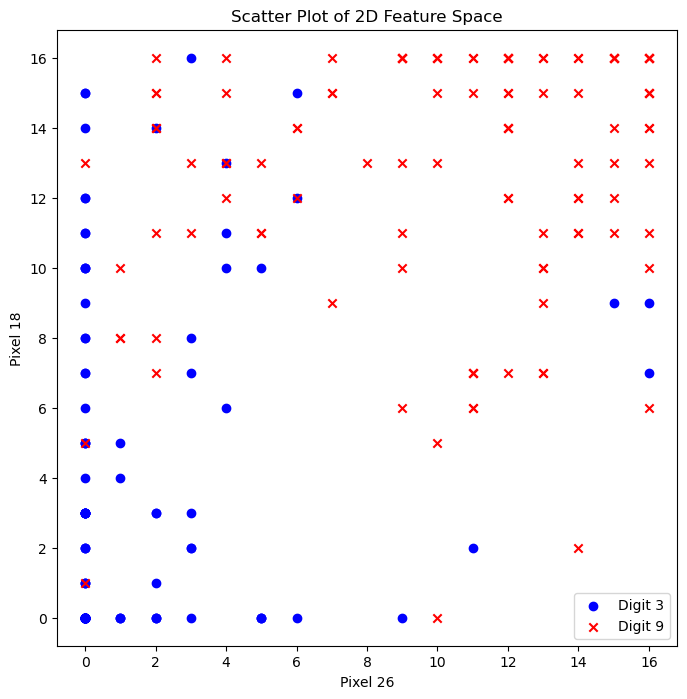

In [112]:
# Extract 2D features from training set
X_train_2d = features2d(X_train)

# Create scatter plot of 2D feature space
plt.figure(figsize=(8, 8))
plt.scatter(X_train_2d[y_train == 3, 0], X_train_2d[y_train == 3, 1], c='b', marker='o', label='Digit 3')
plt.scatter(X_train_2d[y_train == 9, 0], X_train_2d[y_train == 9, 1], c='r', marker='x', label='Digit 9')
plt.title('Scatter Plot of 2D Feature Space')
plt.xlabel('Pixel 26')
plt.ylabel('Pixel 18')
plt.legend()
plt.show()

<div style="color: green; font-weight:
bold">
The solution generates correct and plausible results. However, for loops are used when predicting the labels, which is bad for performance. A vectorized approach as used in the sample solution should be used. 
Labels are converted to -1 and 1 as in sample solution.
</div>

In [113]:
from sklearn.metrics import accuracy_score

def nearest_mean(training_features, training_labels, test_features):
    mean_3 = np.mean(training_features[training_labels == -1], axis=0)
    mean_9 = np.mean(training_features[training_labels == 1], axis=0)

    def dist(x, y):
        return np.sum((x - y) ** 2)

    predicted_labels = []
    for i in range(len(test_features)):
        dist_3 = dist(test_features[i], mean_3)
        dist_9 = dist(test_features[i], mean_9)
        if dist_3 < dist_9:
            predicted_labels.append(-1)
        else:
            predicted_labels.append(1)

    return np.array(predicted_labels)


y_train_new = np.where(y_train == 3, -1, 1) # Convert 3's to -1's and 9's to 1's
y_test_new = np.where(y_test == 3, -1, 1) # Convert 3's to -1's and 9's to 1's

# Compute training error
train_preds = nearest_mean(X_train_2d, y_train_new, X_train_2d)
train_acc = accuracy_score(y_train_new, train_preds)

# Compute test error
X_test_2d = features2d(X_test)
test_preds = nearest_mean(X_train_2d, y_train_new, X_test_2d)
test_acc = accuracy_score(y_test_new, test_preds)

print('Training error:', 1 - train_acc)
print('Test error:', 1 - test_acc)

Training error: 0.11059907834101379
Test error: 0.0821917808219178


# linear combination of features

<div style="color: green; font-weight:
bold">
The solution provides the correct scatter plots including the decision boundaries as well as mean values for test and training data. The sample solution only provides it for one dataset but for two classifiers. 
The proposed solution however uses many for loops compared to the sample solution which should be vectorized to improve performance. 
Also comments are missing in general, which makes it hard to easily understand the quite huge code block for generating the plots.
</div>

error of test set: 0.1232876712328767
error of training set: 0.11981566820276497


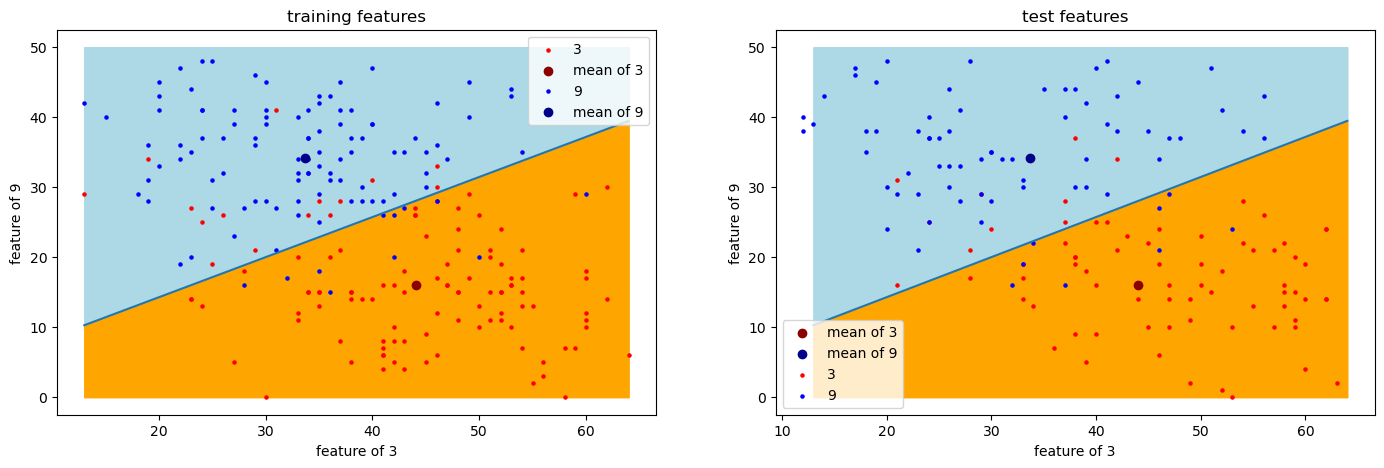

In [58]:
def determine_feature_mean(features):
    features_of_3 = []
    features_of_9 = []

    for i in range(len(y_train)):
        if(y_train[i] == 3):
            features_of_3.append(features[i])
        if(y_train[i] == 9):
            features_of_9.append(features[i])

    mean_of_3 = [np.mean(np.array(features_of_3)[:,0]), np.mean(np.array(features_of_3)[:,1])]
    mean_of_9 = [np.mean(np.array(features_of_9)[:,0]), np.mean(np.array(features_of_9)[:,1])]
    
    return mean_of_3, mean_of_9

def nearest_mean(training_features, training_labels, test_features):
    mean_of_3, mean_of_9 = determine_feature_mean(training_features)
    
    predicted_labels = []
    for i in range(len(test_features)):
        dist_to_3 = (test_features[i][0] - mean_of_3[0])**2 + (test_features[i][1] - mean_of_3[1])**2
        dist_to_9 = (test_features[i][0] - mean_of_9[0])**2 + (test_features[i][1] - mean_of_9[1])**2
        
        if(dist_to_3 < dist_to_9):
            predicted_labels.append(-1)
        else:
            predicted_labels.append(1)

    return predicted_labels

def calculate_error(predicted_labels, real_labels):    
    number_errors = 0
    for i in range(len(predicted_labels)):     
        real_label_modified = -1 if real_labels[i] == 3 else 1
        
        if(not predicted_labels[i] == real_label_modified):
            number_errors += 1
         
        #print(number_errors)
    return number_errors / len(predicted_labels)

def create_decision_line(features):
    mean_of_3, mean_of_9 = determine_feature_mean(features)
    
    def line(x, a, b):
        return a * x + b
    
    def inverse_line(y, a, b):
        return (y - b) / a
    
    x_min = min(np.array(features)[:,0])
    x_max = max(np.array(features)[:,0])
    y_min = min(np.array(features)[:,1])
    y_max = max(np.array(features)[:,1])
 
    slope = (mean_of_3[1] - mean_of_9[1]) / (mean_of_3[0] - mean_of_9[0])
    slope = -slope**-1
    y_intersect = 0.5 * (mean_of_9[1] + mean_of_3[1]) - slope * 0.5 * (mean_of_9[0] + mean_of_3[0])
    x = np.linspace(max(inverse_line(y_min, slope, y_intersect), x_min), min(inverse_line(y_max, slope, y_intersect), x_max), 10)

    return x, line(x, slope, y_intersect)

def do_all():
    
    def features2d(x):
        features = []
        for i in range(len(x)):
            feature_of_3_i = x[i][20] + x[i][28] + 2*x[i][58]# some function of pixels
            feature_of_9_i = x[i][26] + x[i][18] + x[i][37]

            features.append([feature_of_3_i, feature_of_9_i])
        return features
        
    

    training_features = features2d(X_train)
    test_features = features2d(X_test)
    features_of_3 = []
    features_of_9 = []

    for i in range(len(y_train)):
        if(y_train[i] == 3):
            features_of_3.append(training_features[i])
        if(y_train[i] == 9):
            features_of_9.append(training_features[i])

    mean_of_3, mean_of_9 = determine_feature_mean(training_features)
    
    predicted_test_labels = nearest_mean(training_features, y_train, test_features)
    predicted_training_labels = nearest_mean(training_features, y_train, training_features)
    
    print("error of test set: " + str(calculate_error(predicted_test_labels, y_test)))
    print("error of training set: " + str(calculate_error(predicted_training_labels, y_train)))
       
    plt.figure(figsize = (17,5))
    plt.subplot(121)
    x, y = create_decision_line(training_features)
    plt.plot(x, y)
    plt.fill_between(x,y,50, color = "lightblue")
    plt.fill_between(x,y, color = "orange")
    plt.scatter(np.array(features_of_3)[:,0], np.array(features_of_3)[:,1], color = "red", label = "3", s = 5)
    plt.scatter(mean_of_3[0], mean_of_3[1], color = "darkred", label = "mean of 3")
    plt.scatter(np.array(features_of_9)[:,0], np.array(features_of_9)[:,1], color = "blue", label = "9", s = 5)
    plt.scatter(mean_of_9[0], mean_of_9[1], color = "darkblue", label = "mean of 9")
    plt.title("training features")
    plt.xlabel("feature of 3")
    plt.ylabel("feature of 9")
    plt.legend()
    
    test_features_of_3 = []
    test_features_of_9 = []
    
    for i in range(len(y_test)):
        if(y_test[i] == 3):
            test_features_of_3.append(test_features[i])
        if(y_test[i] == 9):
            test_features_of_9.append(test_features[i])
    
    plt.subplot(122)
    plt.plot(x, y)
    plt.fill_between(x,y,50, color = "lightblue")
    plt.fill_between(x,y, color = "orange")
    plt.scatter(mean_of_3[0], mean_of_3[1], color = "darkred", label = "mean of 3")
    plt.scatter(mean_of_9[0], mean_of_9[1], color = "darkblue", label = "mean of 9")
    plt.scatter(np.array(test_features_of_3)[:,0], np.array(test_features_of_3)[:,1], color = "red", label = "3", s = 5)
    plt.scatter(np.array(test_features_of_9)[:,0], np.array(test_features_of_9)[:,1], color = "blue", label = "9", s = 5)
    plt.title("test features")
    plt.xlabel("feature of 3")
    plt.ylabel("feature of 9")
    plt.legend()
    plt.show()

    #preparation
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

indeces = [i for i, x in enumerate(target) if x == 3 or x == 9]
filtered_data = data[indeces]
filtered_images = images[indeces]
filtered_target = target[indeces]

X_train, X_test, y_train, y_test = model_selection.train_test_split(filtered_data, filtered_target, test_size = 0.4, random_state = 0)

do_all()

# 3 LDA

### 3.1 Implement LDA training

In [115]:
def fit_lda(training_features, training_labels):
    unique_labels = np.unique(training_labels)
    num_classes = len(unique_labels)
    num_features = training_features.shape[1]
    
    mu = np.zeros((num_classes, num_features))
    covmat = np.zeros((num_features, num_features))
    p = np.zeros(num_classes)
    
    for i, label in enumerate(unique_labels):
        # get all instances with the current label
        label_indices = np.where(training_labels == label)[0]
        num_instances = len(label_indices)
        p[i] = num_instances / len(training_labels)
        
        # compute class mean
        mu[i] = np.mean(training_features[label_indices], axis=0)
        
        # compute class covariance matrix
        covmat += np.cov(training_features[label_indices].T) * (num_instances - 1)
        
    # divide by the total number of instances to get the covariance matrix
    covmat /= len(training_labels)
    
    return mu, covmat, p

In [116]:
y_train_new = np.where(y_train == 3, -1, 1) # Convert 3's to -1's and 9's to 1's
y_test_new = np.where(y_test == 3, -1, 1) # Convert 3's to -1's and 9's to 1's

# Apply fit function to feature data from task 2
mu_2d, covmat_2d, p_2d = fit_lda(X_train_2d, y_train_new)
print(mu_2d)
print(covmat_2d)
print(p_2d)

[[ 1.45045045  3.5045045 ]
 [ 9.99056604 12.38679245]]
[[16.25100481  3.42470768]
 [ 3.42470768 17.84741593]]
[0.51152074 0.48847926]


In [117]:
# Apply fit function to full vector of 64 pixels
mu_full, covmat_full, p_full = fit_lda(X_train, y_train_new)
print(mu_full.shape)
print(covmat_full.shape)
print(p_full)

(2, 64)
(64, 64)
[0.51152074 0.48847926]


In [101]:
# filter out pixels that have a variance smaller than 0.001
variances = np.var(X_train, axis=0)
mask = variances >= 0.001
X_train_masked = X_train[:, mask]
X_test_masked = X_test[:,mask]

# Apply fit function to filterted vector
mu_masked, covmat_masked, p_masked = fit_lda(X_train_masked, y_train)

### 3.2 Implement LDA prediction

In [119]:
import numpy as np

def predict_lda(mu, covmat, p, test_features):

    covmat_inv = np.linalg.inv(covmat)
    beta = beta = np.dot(covmat_inv,(mu[1] - mu[0]).T)
    b = -0.5 * np.dot((mu[1] + mu[0]),beta) + np.log(p[0] / p[1])
    
    # calculate the discriminant function for each test instance
    discriminant = np.dot(test_features, beta) + b
    
    # assign the predicted label based on the maximum discriminant value
    predicted_labels = np.sign(discriminant)
    
    return predicted_labels

In [120]:
# call predict_lda() on the training and test data to obtain the predicted labels
train_predicted_labels = predict_lda(mu_masked, covmat_masked, p_masked, X_train_masked)
test_predicted_labels = predict_lda(mu_masked, covmat_masked, p_masked, X_test_masked)

# calculate the training and test error rates
train_error_rate = np.mean(train_predicted_labels != y_train_new)
test_error_rate = np.mean(test_predicted_labels != y_test_new)

print("Training error rate:", train_error_rate)
print("Test error rate:", test_error_rate)

Training error rate: 0.004608294930875576
Test error rate: 0.0136986301369863


### 3.3 Visualization

In [121]:
X_train_2d.shape

(217, 2)

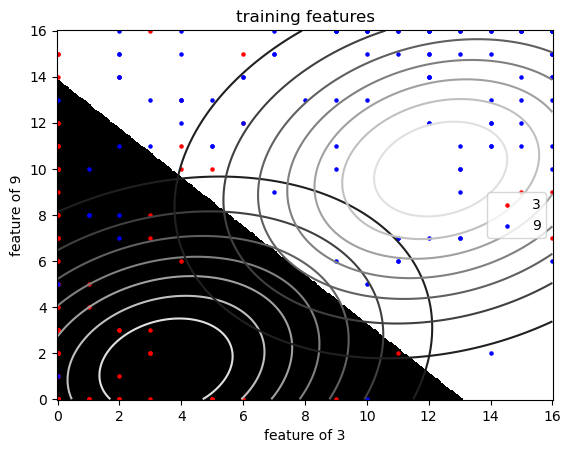

[13.53271285 20.56570789]
[[-0.78325883 -0.62169574]
 [ 0.62169574 -0.78325883]]


In [123]:
#with the feature function from 1.2
training_labels = y_train_new
mu, covmat, p = fit_lda(X_train_2d, training_labels)

predicted_train_labels = predict_lda(mu, covmat, p, X_train_2d)
predicted_test_labels = predict_lda(mu, covmat, p, X_train_2d)

beta = np.dot(np.linalg.inv(covmat), (mu[1] - mu[0]).T) 
b = -0.5 * (mu[1] + mu[0]).dot(beta) + np.log(p[0] / p[1])

training_features = np.array(X_train_2d)
x = np.linspace(min(training_features[:,0]), max(training_features[:,0]), 400)
y = np.linspace(min(training_features[:,1]), max(training_features[:,1]), 400)

def contour(x, y, mu):
    return 1 / np.sqrt(2*np.pi*np.linalg.det(covmat)) * np.exp(-0.5 * (np.array([x - mu[0], y - mu[1]]).dot(np.linalg.inv(covmat)).dot(np.array([x - mu[0], y - mu[1]]))))

z_contour_3 = np.array([np.zeros(len(x)) for i in range(len(y))])
z_contour_9 = np.array([np.zeros(len(x)) for i in range(len(y))])

for i in range(len(x)):
    for j in range(len(y)):
        z_contour_3[i][j] = contour(x[i], y[j], mu[0])
        z_contour_9[i][j] = contour(x[i], y[j], mu[1])

plt.contour(x, y, z_contour_3)
plt.contour(x, y, z_contour_9)

x, y = np.meshgrid(x, y)
z = np.sign(x * beta[0] + y * beta[1] + b)
plt.pcolormesh(x, y, z)
plt.scatter(training_features[y_train == 3, 0], training_features[y_train == 3, 1], color = "red", label = "3", s = 5)
plt.scatter(training_features[y_train == 9, 0], training_features[y_train == 9, 1], color = "blue", label = "9", s = 5)
plt.title("training features")
plt.xlabel("feature of 3")
plt.ylabel("feature of 9")
plt.legend()
plt.show()

eigenvalues, eigenvectors = np.linalg.eig(covmat)
print(eigenvalues)
print(eigenvectors)

In [ ]:
#with all pixels except dead pixels as features

mu, covmat, p = fit_lda(X_train_masked, training_labels)
test_predicted_labels = predict_lda(mu, covmat, p, X_test_masked)
train_predicted_labels = predict_lda(mu, covmat, p, X_train_masked)

# calculate the training and test error rates
train_error_rate = np.mean(train_predicted_labels != y_train_new)
test_error_rate = np.mean(test_predicted_labels != y_test_new)

print("Training error rate:", train_error_rate)
print("Test error rate:", test_error_rate)

# 4

<div style="color: green; font-weight:
bold">The function fit_svm is not implemennted correctly as it is missing the claclucation of the gradients, the adaptation of the learning rate, and the computation of the loss. It seems to me like the wrong formula was being used here. Apart from that the initialization of the variables is equal to the sample solution with zeroes being initialized as weights instead of random values.
    <br>
    
The Predict function on the other hand is essentialy the same as in the sample solution</div>

In [26]:
import numpy as np

def fit_svm(training_features, training_labels, learning_rate=0.001, lambda_param=0.1, n_iters=500):
    '''Parameters
    -------------------
    training_features : numpy.ndarray, contains the training data. Each row is a sample, each column a feature
    training_labels : numpy.ndarray, contains the class-label of the training data.
    learning_rate : float, for the gradient decent (def 0.001)
    lambda_param : float, for the cost function for determining the weight vector.
    Greater lambda leads to higher margin of the hyperplane and vice versa. (def 0.1)
    n_iters : int, number of iterations (def 500)
    -------------------
    Return
    -------------------
    Returns w and b, the weight vector and the bias respectively.
    -------------------
    Trains the SVM by finding the optimal values for w and b using gradient decent.
    '''

    label_ = np.where(training_labels <= 0, -1, 1)  # we want the classes to be labeled either 1 or -1
    n_sample, n_features = training_features.shape  # No. of rows = sample size, No. of columns = feature size

    w = np.zeros(n_features)
    b = 0

    for _ in range(n_iters):
        for idx, x_i in enumerate(training_features):
            condition = label_[idx] * (np.dot(x_i, w) - b) >= 1  # the derivative of the cost function
            # depends on this condition
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, label_[idx]))
                b -= learning_rate * label_[idx]

    return w, b

def predict_svm(X, w, b):
    '''Parameters
    -------------------
    X : numpy.ndarray, contains the data of the samples for the prediction.
    Each row is a sample, each column a feature.
    w : numpy.ndarray, the weight vector.
    b : float, the bias.
    -------------------
    Return
    -------------------
    Returns a numpy.ndarray containing the labels from the prediction.
    '''
    linear_output = np.dot(X, w) - b
    return np.sign(linear_output)


<div style="color: green; font-weight:
bold">
The data points were plotted essentially the same way as in the sample solution. The decision plane however was calculated explicitly here as opposed to 
using the matplotlib functions to do so. Presumably the matplotlib function is the more efficent way to do this. The resulting decision plane however looks resonably well, although the plane could be better itself. This however is most certanly dependent on the differnece in the fit_svm function
    
<br>


</div>

[0.05636221 0.03786291] -0.6621399999996214


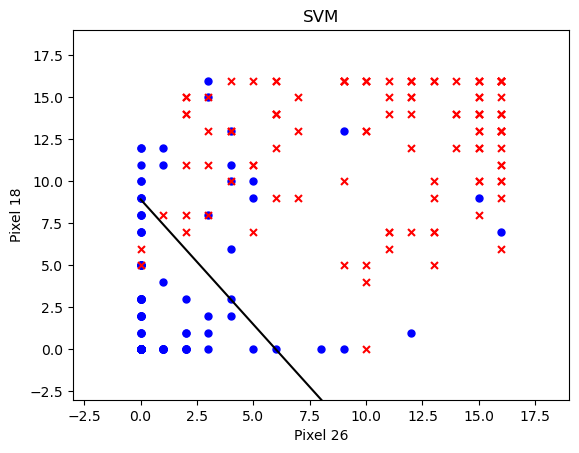

In [43]:
def get_hyperplane_value(x, w, b, offset):   # auxiliary function for visualizing the results
    return (-w[0] * x + b + offset) / w[1]

w, b = fit_svm(X_train_2d, y_train_new, learning_rate=0.00001, lambda_param=0.01, n_iters=1500)
print(w,b)

fig = plt.figure()
aux = fig.add_subplot(1, 1, 1)
plt.scatter(X_train_2d[y_train == 3, 0], X_train_2d[y_train == 3, 1], c='b', marker='o', label='Digit 3', s=25)
plt.scatter(X_train_2d[y_train == 9, 0], X_train_2d[y_train == 9, 1], c='r', marker='x', label='Digit 9', s=25)
plt.xlabel('Pixel 26')
plt.ylabel('Pixel 18')
#plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_new, s=25)
plt.title('SVM')

x0_1 = np.amin(X_train_2d[:, 0])
x0_2 = np.amax(X_train_2d[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_a = get_hyperplane_value(x0_1, w, b, -1)
x1_2_a = get_hyperplane_value(x0_2, w, b, -1)

x1_1_b = get_hyperplane_value(x0_1, w, b, 1)
x1_2_b = get_hyperplane_value(x0_2, w, b, 1)

aux.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
aux.plot([x0_1, x0_2], [x1_1_a, x1_2_a], 'k')
aux.plot([x0_1, x0_2], [x1_1_b, x1_2_b], 'k')

x1_min = np.amin(X_train_2d[:, 1])
x1_max = np.amax(X_train_2d[:, 1])
aux.set_ylim([x1_min - 3, x1_max + 3])
aux.set_xlim([x0_1 - 3, x0_2 + 3])

plt.show()

Since it is not possible to see how many blue dots and red x are in one spot its is hard to judge the hyperplane. however it is minimizing the red x to be on the "blue dots" side of the hyperplane.

<div style="color: green; font-weight:
bold">
Here the hyperplane was claculated again for the scikit learn svm, which hasn't been done in the sample solution and is a nice addition for comparing the performance.

<br>


</div>

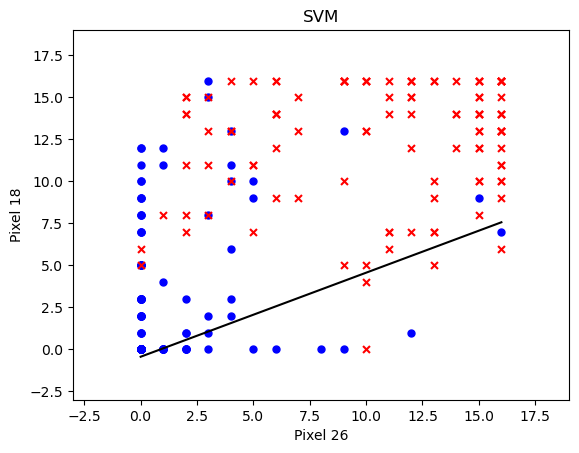

In [44]:
from sklearn.svm import SVC

# train an SVM on the training data
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_2d, y_train_new)

# extract the hyperplane parameters
w = svm.coef_[0]
b = svm.intercept_[0]

fig = plt.figure()
aux = fig.add_subplot(1, 1, 1)
plt.scatter(X_train_2d[y_train == 3, 0], X_train_2d[y_train == 3, 1], c='b', marker='o', label='Digit 3', s=25)
plt.scatter(X_train_2d[y_train == 9, 0], X_train_2d[y_train == 9, 1], c='r', marker='x', label='Digit 9', s=25)
plt.xlabel('Pixel 26')
plt.ylabel('Pixel 18')
#plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_new, s=25)
plt.title('SVM')

x0_1 = np.amin(X_train_2d[:, 0])
x0_2 = np.amax(X_train_2d[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_a = get_hyperplane_value(x0_1, w, b, -1)
x1_2_a = get_hyperplane_value(x0_2, w, b, -1)

x1_1_b = get_hyperplane_value(x0_1, w, b, 1)
x1_2_b = get_hyperplane_value(x0_2, w, b, 1)

aux.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
aux.plot([x0_1, x0_2], [x1_1_a, x1_2_a], 'k')
aux.plot([x0_1, x0_2], [x1_1_b, x1_2_b], 'k')

x1_min = np.amin(X_train_2d[:, 1])
x1_max = np.amax(X_train_2d[:, 1])
aux.set_ylim([x1_min - 3, x1_max + 3])
aux.set_xlim([x0_1 - 3, x0_2 + 3])

plt.show()

The sklearn classifier does not seem to find a good hyperplane. However it is not finetuned and we can not see how many dots or x are in one spot.

<div style="color: green; font-weight:
bold">
Down below is testing of the functions providd above and not part of the actual tasks, hence cannot be compared, but it is good to have it as "proof" that the functions are working as expected
</div>

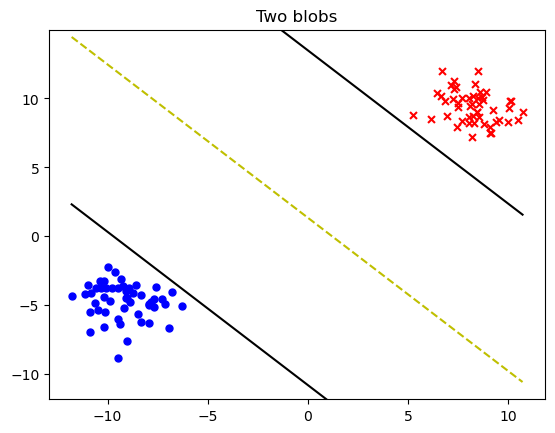

In [55]:
from sklearn.datasets import make_blobs


X, labels = make_blobs(n_features=2, centers=2, cluster_std=1.25, random_state=234)
labels = np.where(labels == 0, -1, 1)

w, b = fit_svm(X, labels)

fig = plt.figure()
aux = fig.add_subplot(1, 1, 1)

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='b', marker='o', label='Blob A', s=25)
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='r', marker='x', label='Blob B', s=25)
plt.title('Two blobs')

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_a = get_hyperplane_value(x0_1, w, b, -1)
x1_2_a = get_hyperplane_value(x0_2, w, b, -1)

x1_1_b = get_hyperplane_value(x0_1, w, b, 1)
x1_2_b = get_hyperplane_value(x0_2, w, b, 1)

aux.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
aux.plot([x0_1, x0_2], [x1_1_a, x1_2_a], 'k')
aux.plot([x0_1, x0_2], [x1_1_b, x1_2_b], 'k')

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
aux.set_ylim([x1_min - 3, x1_max + 3])

plt.show()


I was curious as to whether my code actually works, which is why I decided to test it on this simple example and it seems to plot and work correctly.

<div style="color: green; font-weight:
bold">
Some subtasks are missing in this soltuion:
    <br>
    - Finding an optimal lambda value
    <br>
    - Using only the two features and then all features for the selfmade classifier
    <br>
    - Loss comparison and depiction for the models
</div>